In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

In [312]:
path = "marketing_campaign.xlsx"

In [313]:
df = pd.read_excel(path)

In [314]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [315]:
Num = [features for features in df.columns if df[features].dtypes != 'O'] 

Cat = [features for features in df.columns if df[features].dtypes == 'O']

print('Numerical Variables - ')
print(Num)
print('Categorical Variable - ')
print(Cat)

Numerical Variables - 
['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Categorical Variable - 
['Education', 'Marital_Status', 'Dt_Customer']


In [316]:
df = df.drop(['Response','Z_Revenue', 'Z_CostContact'	,'Z_Revenue', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2'],axis = 1)

In [317]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,172,88,88,3,8,10,4,7,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,46,27,15,5,5,3,6,5,0,0


In [318]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
Complain                0
dtype: int64

In [319]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,1,1,1,0,2,7,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,3,263,362,0,27,0,0,1,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,2,39,1,1,3,4,2,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,10,7,3,2,1,4,6,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,2,2,6,2,2,0,3,6,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,17,4,17,3,3,0,3,8,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,49,37,53,12,7,2,8,9,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,0,1,1,1,0,2,7,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,98,28,18,1,2,4,8,1,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,10,0,15,3,6,1,7,6,0,0


In [320]:
df['Income'].fillna(np.mean(df['Income']), inplace = True) 

In [321]:
df['Income'] = df['Income']/1000

In [322]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain
0,5524,1957,Graduation,Single,58.138,0,0,2012-09-04,58,635,...,172,88,88,3,8,10,4,7,0,0
1,2174,1954,Graduation,Single,46.344,1,1,2014-03-08,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71.613,0,0,2013-08-21,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26.646,1,0,2014-02-10,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58.293,1,0,2014-01-19,94,173,...,46,27,15,5,5,3,6,5,0,0


In [323]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [324]:
df['Customer_Age'] = 2022 - df.Year_Birth.to_numpy()

In [325]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Customer_Age
0,5524,1957,Graduation,Single,58.138,0,0,2012-09-04,58,635,...,88,88,3,8,10,4,7,0,0,65
1,2174,1954,Graduation,Single,46.344,1,1,2014-03-08,38,11,...,1,6,2,1,1,2,5,0,0,68
2,4141,1965,Graduation,Together,71.613,0,0,2013-08-21,26,426,...,21,42,1,8,2,10,4,0,0,57
3,6182,1984,Graduation,Together,26.646,1,0,2014-02-10,26,11,...,3,5,2,2,0,4,6,0,0,38
4,5324,1981,PhD,Married,58.293,1,0,2014-01-19,94,173,...,27,15,5,5,3,6,5,0,0,41


In [326]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [327]:
df['Education'].replace(['2n Cycle'], ['Master'], inplace = True)

In [328]:
df['Education'].value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

In [329]:
df.drop(['ID'], axis = 1, inplace = True)

In [330]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [331]:
#df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Single":"Single",})

In [332]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

df["Is_Parent"] = np.where(df.TotalKids> 0, 1, 0)

In [333]:
df['Customer_Age'].value_counts()

46     89
51     87
47     83
50     79
44     77
52     77
49     74
57     74
53     71
48     69
66     55
64     53
43     53
70     52
45     52
54     51
63     51
56     50
68     50
67     49
62     49
40     45
59     45
55     44
60     44
65     43
71     43
39     42
36     42
58     42
42     39
41     39
38     38
61     36
69     35
37     32
33     30
73     30
72     29
34     29
35     27
74     21
32     18
76     16
75     16
31     15
30     13
77      8
79      7
78      7
29      5
27      5
28      3
26      2
123     1
81      1
129     1
122     1
82      1
Name: Customer_Age, dtype: int64

In [334]:
#removing outliers
df = df[(df["Customer_Age"]<90)]
df = df[(df["Income"]<600)]

In [335]:
cross_df = df[df.AcceptedCmp1 == 1]
cross_df.shape

(144, 22)

In [336]:
df.drop(['Year_Birth'], axis = 1, inplace = True)

In [337]:
pd.crosstab(index= cross_df['AcceptedCmp1'] , columns=cross_df['Marital_Status'])

Marital_Status,Divorced,Married,Single,Together,Widow
AcceptedCmp1,,,,,
1,12,63,32,32,5


In [338]:
pd.crosstab(index= cross_df['AcceptedCmp1'] , columns=cross_df['Education'])

Education,Graduation,Master,PhD
AcceptedCmp1,,,
1,82,32,30


In [339]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Customer_Age
0,Graduation,Single,58.138,0,0,2012-09-04,58,635,88,546,...,88,88,3,8,10,4,7,0,0,65
1,Graduation,Single,46.344,1,1,2014-03-08,38,11,1,6,...,1,6,2,1,1,2,5,0,0,68
2,Graduation,Together,71.613,0,0,2013-08-21,26,426,49,127,...,21,42,1,8,2,10,4,0,0,57
3,Graduation,Together,26.646,1,0,2014-02-10,26,11,4,20,...,3,5,2,2,0,4,6,0,0,38
4,PhD,Married,58.293,1,0,2014-01-19,94,173,43,118,...,27,15,5,5,3,6,5,0,0,41


In [340]:
Num = [features for features in df.columns if df[features].dtypes != 'O'] 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


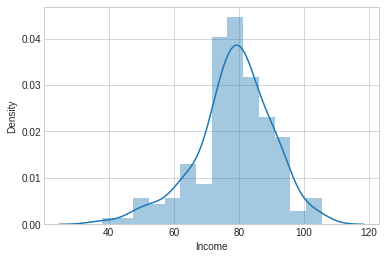

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


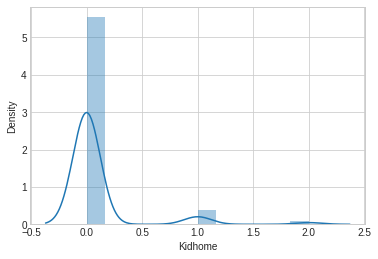

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


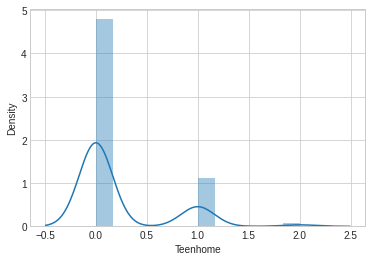

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


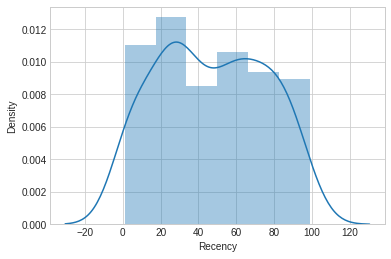

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


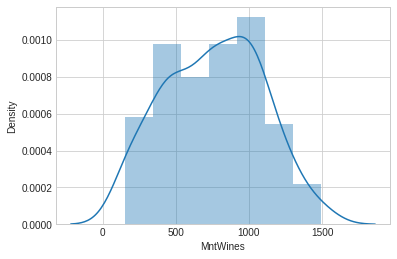

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


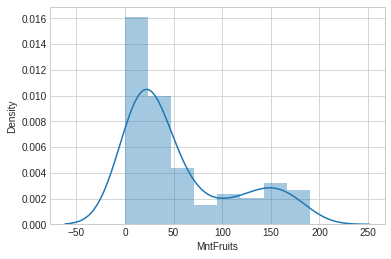

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


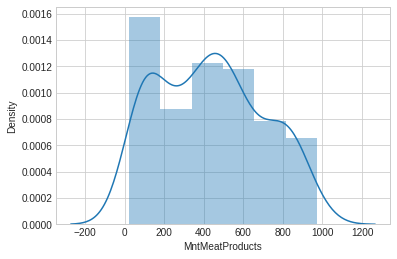

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


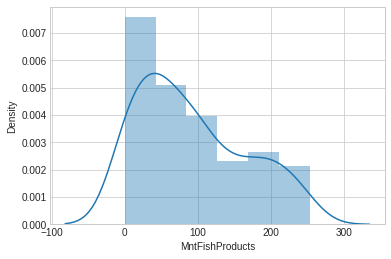

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


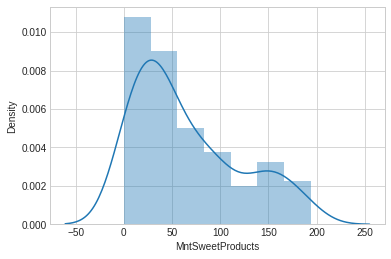

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


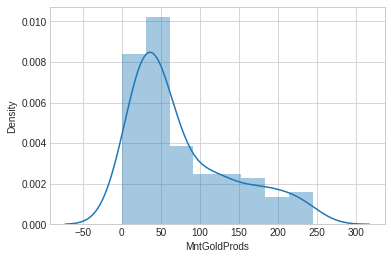

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


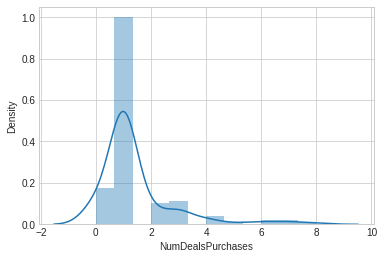

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


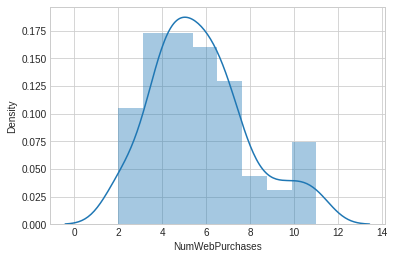

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


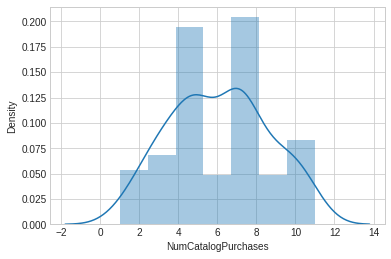

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


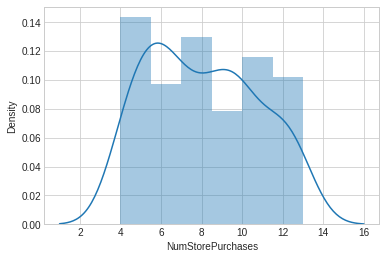

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


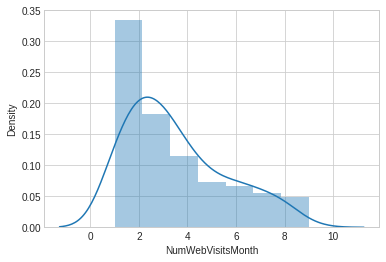

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


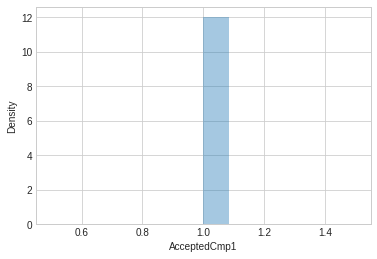

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


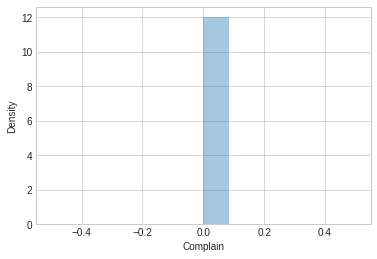

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


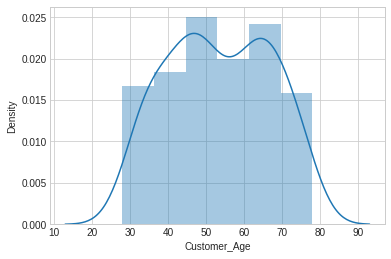

In [341]:
for f in Num:
    sns.distplot(cross_df[f])
    plt.show()

In [342]:
print(Cat)

['Education', 'Marital_Status', 'Dt_Customer']


In [343]:
df.drop(['Dt_Customer'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


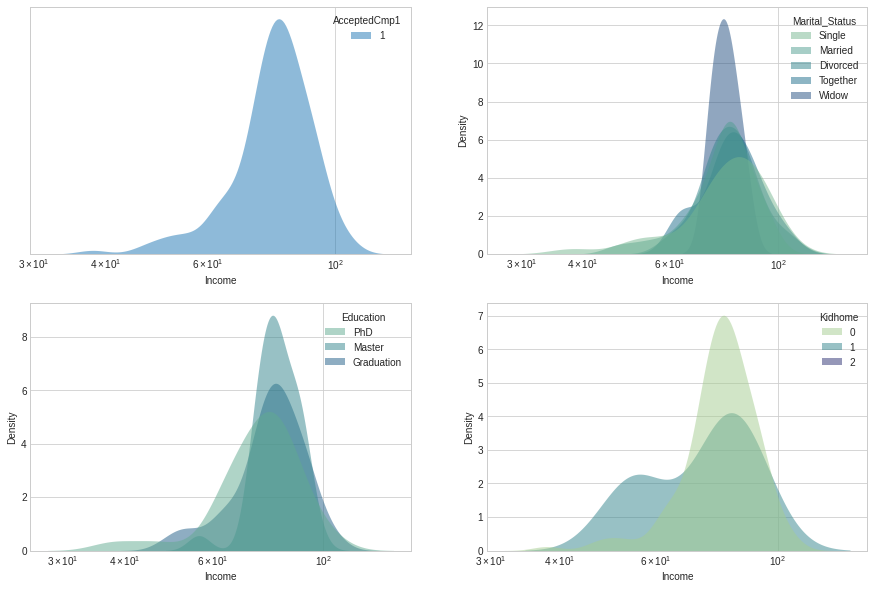

In [344]:

plt.figure(figsize=(15,10))
plt.subplot(221)
sns.kdeplot(
   data=cross_df, x="Income", hue="AcceptedCmp1", log_scale= True,
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel('Income')

plt.subplot(222)
sns.kdeplot(
   data=cross_df, x="Income", hue="Marital_Status", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

plt.subplot(223)
sns.kdeplot(
   data=cross_df, x="Income", hue="Education", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)


plt.subplot(224)
sns.kdeplot(
   data=cross_df, x="Income", hue="Kidhome", log_scale= True,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

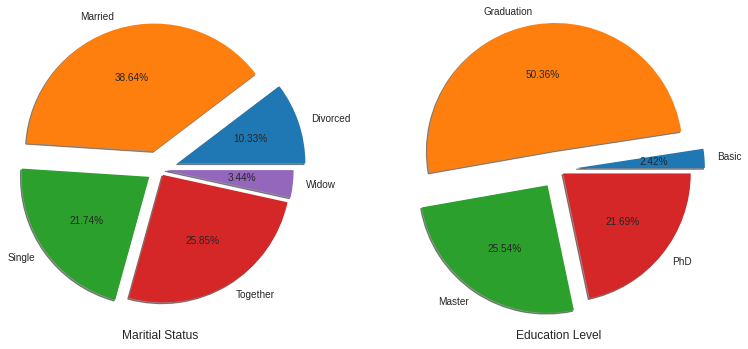

In [345]:
cust_count=df.groupby("Marital_Status").count()['Customer_Age']
label=df.groupby('Marital_Status').count()['Customer_Age'].index
fig, ax = plt.subplots(1, 2, figsize = (10, 12))
ax[0].pie(cust_count, labels=label, shadow=True, autopct='%1.2f%%',radius=2,explode=[0.3,0.3,0.2,0.1,0.1])
ax[0].set_title('Maritial Status', y=-0.6)
cust_count = df.groupby("Education").count()['Customer_Age']
label = df.groupby('Education').count()['Customer_Age'].index
ax[1].pie(cust_count, labels=label, shadow=True, autopct='%1.2f%%',radius=2,explode=[0.3,0.3,0.3,0.1])
ax[1].set_title('Education Level', y=-0.6)
plt.subplots_adjust(wspace = 1.5, hspace =0)
plt.show()

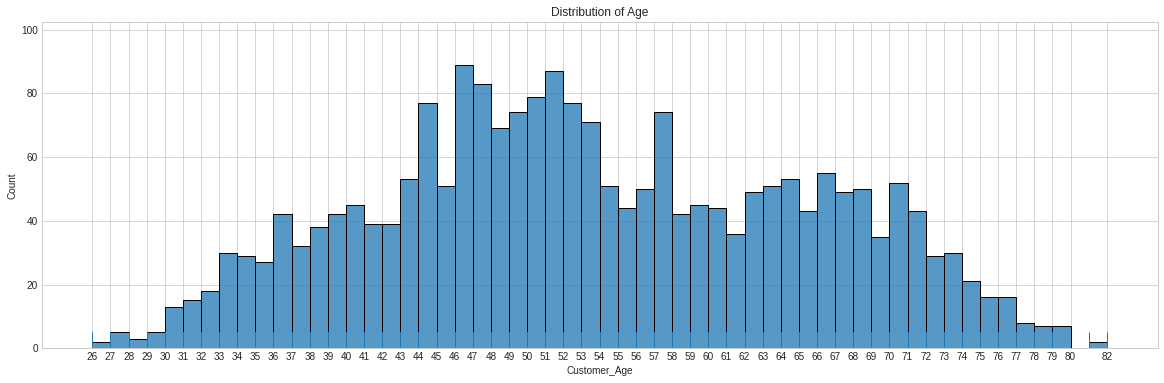

In [346]:
plt.figure(figsize=(20, 6))
plt.title('Distribution of Age')
ax = sns.histplot(df['Customer_Age'].sort_values(), bins=56)
sns.rugplot(data=df['Customer_Age'], height=.05)
plt.xticks(np.linspace(df['Customer_Age'].min(), df['Customer_Age'].max(), 56, dtype=int, endpoint = True))
plt.show()

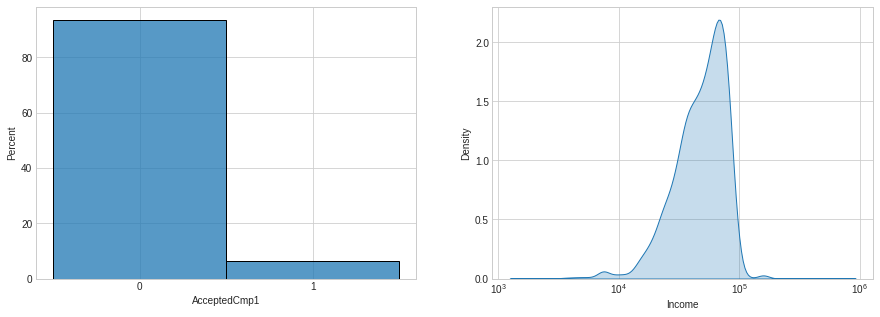

In [347]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(data=df1, x='AcceptedCmp1', stat="percent", discrete=True)
plt.xticks([0, 1])

plt.subplot(122)

sns.kdeplot(data=df1, x="Income", shade=True, log_scale=True)
plt.show()

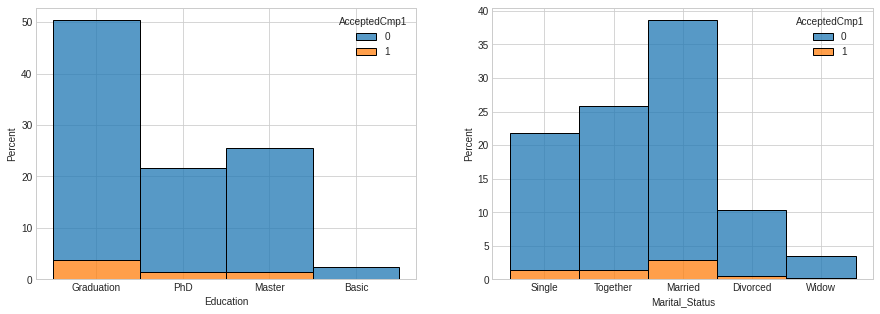

In [348]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=df1, x="Education", hue="AcceptedCmp1", multiple="stack", stat="percent")

plt.subplot(122)
sns.histplot(data=df1, x="Marital_Status", hue="AcceptedCmp1",stat="percent", multiple="stack")
plt.show()

In [349]:
le=LabelEncoder()
label=le.fit_transform(df['Education'])
label
df.drop('Education',axis=1)
df['Education']=label

label1=le.fit_transform(df['Marital_Status'])
df.drop('Marital_Status',axis=1)
df['Marital_Status']=label1
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Customer_Age
0,1,2,58.138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,65
1,1,2,46.344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68
2,1,3,71.613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57
3,1,3,26.646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38
4,3,1,58.293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,1,61.223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,55
2236,3,3,64.014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,1,0,76
2237,1,0,56.981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,41
2238,2,3,69.245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,66


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   int64  
 1   Marital_Status       2236 non-null   int64  
 2   Income               2236 non-null   float64
 3   Kidhome              2236 non-null   int64  
 4   Teenhome             2236 non-null   int64  
 5   Recency              2236 non-null   int64  
 6   MntWines             2236 non-null   int64  
 7   MntFruits            2236 non-null   int64  
 8   MntMeatProducts      2236 non-null   int64  
 9   MntFishProducts      2236 non-null   int64  
 10  MntSweetProducts     2236 non-null   int64  
 11  MntGoldProds         2236 non-null   int64  
 12  NumDealsPurchases    2236 non-null   int64  
 13  NumWebPurchases      2236 non-null   int64  
 14  NumCatalogPurchases  2236 non-null   int64  
 15  NumStorePurchases    2236 non-null   i

In [351]:
y=df['AcceptedCmp1']
x=df.drop(['AcceptedCmp1'],axis=1)

In [352]:
x

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Age
0,1,2,58.138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,65
1,1,2,46.344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,68
2,1,3,71.613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,57
3,1,3,26.646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,38
4,3,1,58.293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,1,61.223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,55
2236,3,3,64.014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,76
2237,1,0,56.981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,41
2238,2,3,69.245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,66


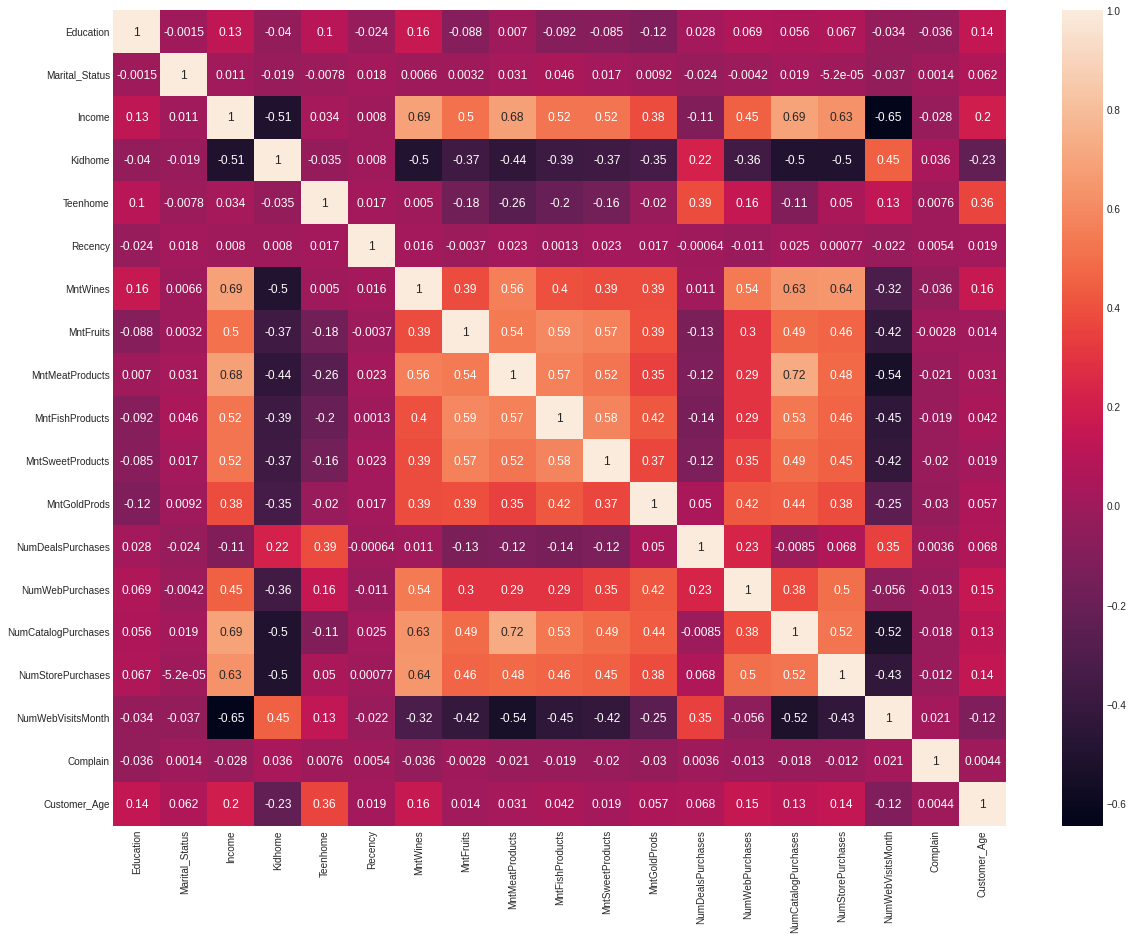

In [353]:
plt.figure(figsize = (20,15))
corr_matrix=x.corr()
sns.heatmap(corr_matrix,annot=True,annot_kws ={"size":12})

In [354]:
corr_matrix

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Age
Education,1.000000,-0.001493,0.128552,-0.039948,0.101281,-0.023624,0.162216,-0.088367,0.006959,-0.092265,-0.085285,-0.116042,0.028168,0.068547,0.056265,0.066851,-0.034285,-0.035647,0.139555
Marital_Status,-0.001493,1.000000,0.010723,-0.018957,-0.007755,0.018495,0.006597,0.003184,0.031295,0.045515,0.017090,0.009249,-0.024070,-0.004237,0.019176,-0.000052,-0.037460,0.001402,0.061562
Income,0.128552,0.010723,1.000000,-0.510263,0.034376,0.007963,0.685944,0.504859,0.684170,0.518381,0.518161,0.383593,-0.107140,0.450579,0.693660,0.627943,-0.646426,-0.027912,0.198889
Kidhome,-0.039948,-0.018957,-0.510263,1.000000,-0.035339,0.007964,-0.496166,-0.372442,-0.436901,-0.387404,-0.370486,-0.349462,0.221489,-0.361982,-0.502331,-0.500192,0.447626,0.036336,-0.233894
Teenhome,0.101281,-0.007755,0.034376,-0.035339,1.000000,0.016746,0.005047,-0.176117,-0.261171,-0.204177,-0.162527,-0.020447,0.388293,0.155649,-0.110551,0.050177,0.134636,0.007553,0.363172
Recency,-0.023624,0.018495,0.007963,0.007964,0.016746,1.000000,0.016321,-0.003717,0.023446,0.001314,0.022796,0.017168,-0.000638,-0.010776,0.025226,0.000771,-0.021850,0.005361,0.019396
MntWines,0.162216,0.006597,0.685944,-0.496166,0.005047,0.016321,1.000000,0.388472,0.561886,0.398956,0.385845,0.386234,0.011173,0.542136,0.634716,0.642313,-0.320287,-0.035974,0.162809
MntFruits,-0.088367,0.003184,0.504859,-0.372442,-0.176117,-0.003717,0.388472,1.000000,0.542030,0.594415,0.567030,0.389999,-0.131792,0.296986,0.487274,0.463136,-0.417405,-0.002813,0.013657
MntMeatProducts,0.006959,0.031295,0.684170,-0.436901,-0.261171,0.023446,0.561886,0.542030,1.000000,0.567813,0.523329,0.348727,-0.122242,0.293502,0.723473,0.479983,-0.539183,-0.020750,0.030729
MntFishProducts,-0.092265,0.045515,0.518381,-0.387404,-0.204177,0.001314,0.398956,0.594415,0.567813,1.000000,0.579490,0.422018,-0.139263,0.293424,0.533969,0.459997,-0.445729,-0.018842,0.042359


In [355]:
import statsmodels.api as sm
X=sm.add_constant(x)
regressorOLS = sm.OLS(y, X).fit()
regressorOLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AcceptedCmp1   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     26.97
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           3.63e-86
Time:                        04:11:52   Log-Likelihood:                 200.50
No. Observations:                2236   AIC:                            -361.0
Df Residuals:                    2216   BIC:                            -246.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0169      0.040     -0.419      0.675      -0.096       0.062
Education              -0.0144      0.006     -2.427      0.015      -0.026      -0.003
Marital_Status         -0.0048      0.004     -1.088      0.277      -0.014       0.004
Income                  0.0018      0.000      4.088      0.000       0.001       0.003
Kidhome                 0.0259      0.012      2.174      0.030       0.003       0.049
Teenhome               -0.0328      0.011     -2.944      0.003      -0.055      -0.011
Recency                -0.0002      0.000     -1.479      0.139      -0.001    7.84e-05
MntWines                0.0002   2.37e-05      9.218      0.000       0.000       0.000
MntFruits              -0.0003      0.000     -2.019      0.044      -0.001   -9.54e-06
MntMeatProducts      3.017e-05    3.6e-05      0.837      0.402   -4.05e-05       0.000
MntFishProducts         0.0004      0.000      3.021      0.003       0.000       0.001
MntSweetProducts        0.0004      0.000      2.268      0.023    4.83e-05       0.001
MntGoldProds         1.877e-05      0.000      0.169      0.866      -0.000       0.000
NumDealsPurchases      -0.0102      0.003     -3.260      0.001      -0.016      -0.004
NumWebPurchases        -0.0020      0.002     -0.834      0.404      -0.007       0.003
NumCatalogPurchases     0.0049      0.003      1.774      0.076      -0.001       0.010
NumStorePurchases      -0.0092      0.002     -4.151      0.000      -0.014      -0.005
NumWebVisitsMonth       0.0049      0.003      1.570      0.117      -0.001       0.011
Complain               -0.0281      0.050     -0.561      0.575      -0.126       0.070
Customer_Age        -9.735e-05      0.000     -0.216      0.829      -0.001       0.001
==============================================================================
Omnibus:                     1186.239   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7242.605
Skew:                           2.525   Prob(JB):                         0.00
Kurtosis:                      10.228   Cond. No.                     5.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [356]:
x1 = x

In [357]:
x1=df.drop(['Marital_Status', 'MntMeatProducts'],axis=1)

In [358]:
import statsmodels.api as sm
X=sm.add_constant(x1)
regressorOLS = sm.OLS(y, X).fit()
regressorOLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AcceptedCmp1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.267e+31
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        04:11:59   Log-Likelihood:                 75305.
No. Observations:                2236   AIC:                        -1.506e+05
Df Residuals:                    2217   BIC:                        -1.505e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.128e-17   1.02e-16      0.110      0.912    -1.9e-16    2.12e-16
Education            3.426e-17   1.54e-17      2.228      0.026     4.1e-18    6.44e-17
Income              -1.083e-17   1.12e-18     -9.637      0.000    -1.3e-17   -8.63e-18
Kidhome             -8.327e-17   3.09e-17     -2.698      0.007   -1.44e-16   -2.28e-17
Teenhome             4.879e-17   2.79e-17      1.747      0.081   -5.99e-18    1.04e-16
Recency             -7.774e-18   4.21e-19    -18.460      0.000    -8.6e-18   -6.95e-18
MntWines            -8.979e-19   6.21e-20    -14.463      0.000   -1.02e-18   -7.76e-19
MntFruits            4.499e-18   4.24e-19     10.617      0.000    3.67e-18    5.33e-18
MntFishProducts      5.096e-18    3.2e-19     15.920      0.000    4.47e-18    5.72e-18
MntSweetProducts     2.805e-18   4.07e-19      6.901      0.000    2.01e-18     3.6e-18
MntGoldProds         2.155e-18   2.87e-19      7.516      0.000    1.59e-18    2.72e-18
NumDealsPurchases    2.906e-17    8.1e-18      3.589      0.000    1.32e-17    4.49e-17
NumWebPurchases      6.614e-18   6.12e-18      1.081      0.280   -5.38e-18    1.86e-17
NumCatalogPurchases  9.975e-18   6.81e-18      1.464      0.143   -3.38e-18    2.33e-17
NumStorePurchases   -2.445e-17   5.74e-18     -4.258      0.000   -3.57e-17   -1.32e-17
NumWebVisitsMonth    1.605e-17   7.98e-18      2.012      0.044    4.07e-19    3.17e-17
AcceptedCmp1            1.0000   5.49e-17   1.82e+16      0.000       1.000       1.000
Complain              1.47e-16   1.29e-16      1.136      0.256   -1.07e-16    4.01e-16
Customer_Age         6.749e-18   1.16e-18      5.804      0.000    4.47e-18    9.03e-18
==============================================================================
Omnibus:                      104.832   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.373
Skew:                          -0.347   Prob(JB):                     2.28e-43
Kurtosis:                       4.275   Cond. No.                     4.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [382]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=143)

In [383]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1788, 18)
(448, 18)
(1788,)
(448,)


In [384]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(x_train,y_train)
print(loggreg_final.score(x_train,y_train))

0.9457494407158836


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [385]:
import math
w = w1, w2, w3, w4, w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18, w19 = loggreg_final.coef_[0]
feature_names = ["Education", "Marital_Status", "Income", "Kidhome", "Teenhome","Recency","MntWines","MntFruits", "MntMeatProducts","MntFishProducts","MntSweetProducts"
,"MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases", "NumStorePurchases","NumWebVisitsMonth","Complain","Customer_Age"]
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

ValueError: ignored

In [386]:
y_pred=logreg.predict(x_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction


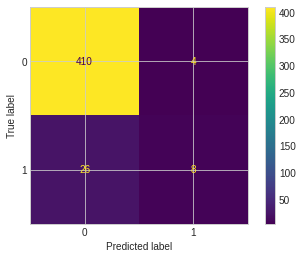

In [387]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [367]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       414
           1       0.67      0.24      0.35        34

    accuracy                           0.93       448
   macro avg       0.80      0.61      0.66       448
weighted avg       0.92      0.93      0.92       448



In [368]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [ ]:
df1.to_excel("output2.xlsx") 

In [371]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=143)

In [372]:
svc_model=svm.SVC(kernel='linear')
svc_final=svc_model.fit(x_train,y_train)
print(svc_final.score(x_train,y_train))

0.9395973154362416


In [373]:
y_pred1=svc_model.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       414
           1       0.00      0.00      0.00        34

    accuracy                           0.92       448
   macro avg       0.46      0.50      0.48       448
weighted avg       0.85      0.92      0.89       448



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [374]:
cm1=confusion_matrix(y_test, y_pred1)

In [377]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix,f1_score,roc_auc_score,ConfusionMatrixDisplay

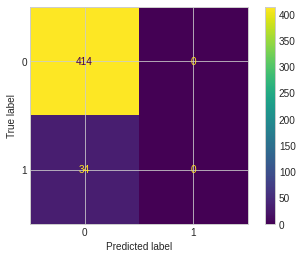

In [378]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=svc_model.classes_)
disp.plot()

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()